In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.path as mpath

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
tlxfwd1 = pd.read_pickle('/Users/luken2/Documents/GitHub/car-leases/data/tlxfwd.pickle')
tlxfwd2 = pd.read_pickle('/Users/luken2/Documents/GitHub/car-leases/data/tlxfwd2.pickle')
tlxfwd3 = pd.read_pickle('/Users/luken2/Documents/GitHub/car-leases/data/tlxfwd3.pickle')
tlxfwd = pd.concat([tlxfwd1, tlxfwd2, tlxfwd3])

In [3]:
tlxfwd.reset_index(drop=True, inplace=True)
tlxfwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 15 columns):
price             468 non-null int64
year              468 non-null object
make              468 non-null object
model             468 non-null object
mileage           468 non-null int64
mpg_city          468 non-null int64
mpg_hwy           468 non-null int64
drive_type        468 non-null object
engine            468 non-null object
transmission      468 non-null object
style             465 non-null object
fuel_type         468 non-null object
interior_color    468 non-null object
exterior_color    468 non-null object
location          468 non-null object
dtypes: int64(4), object(11)
memory usage: 55.0+ KB


In [4]:
tlxfwd.dropna(inplace=True)

In [5]:
tlxfwd.reset_index(inplace=True, drop=True)

In [6]:
tlxfwd['style'].value_counts()

FWD                                 150
FWD with Technology Package         128
2.4L FWD with Technology Package     57
2.4L FWD                             53
I4 FWD                               39
I4 FWD with Technology Package       37
2.4L FWD with A-Spec Package          1
Name: style, dtype: int64

In [7]:
new_column = []
# loops through each row in the column 'style'
for style in tlxfwd['style']:
        
# Creates a list called new_column with each value
# being the cars package and creates a Pandas Series called package
        
    if 'Technology Package' in str(style):            
        new_column.append('Technology Package')
        
    elif 'A-Spec' and 'Package' in str(style):
        new_column.append('A-Spec Package')
        
    else:
        new_column.append('Standard Package')
            
    package = pd.Series(new_column)
        
tlxfwd['package'] = package

In [9]:
tlxfwd.head()

,price,year,make,model,mileage,mpg_city,mpg_hwy,drive_type,engine,transmission,style,fuel_type,interior_color,exterior_color,location,package
0,19390,2016,Acura,TLX,33710,24,35,FWD,2.4L Inline-4 Gas,Automatic,FWD with Technology Package,Gas,Black,Gray,"Marietta, GA",Technology Package
1,23691,2018,Acura,TLX,29328,23,33,FWD,2.4L Inline-4 Gas,Automatic,2.4L FWD with Technology Package,Gas,Ebony,Crystal Black Pearl,"Henderson, NV",Technology Package
2,16789,2016,Acura,TLX,33686,24,35,FWD,2.4L Inline-4 Gas,Automatic,FWD,Gas,Graystone,Slate Silver Metallic,"Apex, NC",Standard Package
3,16484,2016,Acura,TLX,14172,24,35,FWD,2.4L Inline-4 Gas,Automatic,FWD,Gas,Unknown,Black Copper Pearl,"Seffner, FL",Standard Package
4,15999,2016,Acura,TLX,24076,24,35,FWD,2.4L Inline-4 Gas,Automatic,FWD,Gas,Black,Gray,"Atlanta, GA",Standard Package


In [10]:
new_column2 = []
# loops through each row in the column 'style'
for year in tlxfwd['year']:
        
# Creates a list called new_column2 with each value
# being the a number 0-3 associated with the year, {2016: 0, 2017: 1, 2018: 2, 2019: 3}.
       
    if '2016' in str(year):            
        new_column2.append(0)
    elif '2017' in str(year):
        new_column2.append(1)
    elif '2018' in str(year):
        new_column2.append(2)
    elif '2019' in str(year):
        new_column2.append(3)
            
    color = pd.Series(new_column2)
        
tlxfwd['color_num'] = color

In [11]:
del tlxfwd['style']

In [12]:
tlx = tlxfwd.loc[:,['price', 'year', 'mileage', 'drive_type', 'engine', 'package', 'color_num']]

In [13]:
tlx['year'] = pd.to_numeric(tlx['year'])

In [14]:
tlx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 7 columns):
price         465 non-null int64
year          465 non-null int64
mileage       465 non-null int64
drive_type    465 non-null object
engine        465 non-null object
package       465 non-null object
color_num     465 non-null int64
dtypes: int64(4), object(3)
memory usage: 25.6+ KB


In [168]:
tech = tlx.loc[(tlx['package'] == 'Technology Package')]
standard = tlx.loc[(tlx['package'] == 'Standard Package')]

## TLX Depreciation with Standard Package

In [169]:
standard['mileage_year'] = standard['mileage'] * standard['year']

//anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [170]:
new_cars = [{'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0}, 
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0}, 
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0}, 
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0}, 
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0},
           {'price': 33995, 'year': 2020, 'mileage': 0, 'drive_type': 'FWD', 
           'engine': '2.4L Inline-4 Gas', 'package': 'Standard Package', 'color_num': 5,
            'mileage_year': 0}]

In [171]:
standard = pd.concat([standard, pd.DataFrame(new_cars)])

In [172]:
y_standard = standard['price']
X_standard = standard.loc[:,['mileage', 'year', 'mileage_year']]

In [173]:
X_standard_train_val, X_standard_test, y_standard_train_val, y_standard_test = train_test_split(X_standard, y_standard, test_size=0.2,random_state=41)
X_standard_train, X_standard_val, y_standard_train, y_standard_val = train_test_split(X_standard_train_val, y_standard_train_val, test_size=.25, random_state=43)

In [174]:
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_standard_train, y_standard_train)
poly_model.score(X_standard_val, y_standard_val)

0.947068821262603

In [177]:
poly_model.fit(X_standard_train_val, y_standard_train_val)
poly_model.score(X_standard_test, y_standard_test)

0.9356775709487962

In [178]:
mae = np.mean(abs(y_standard_test - poly_model.predict(X_standard_test)))
mae

1012.1458547891773

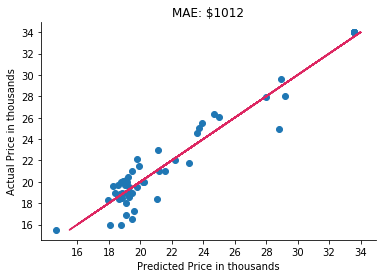

In [203]:
fig4, ax4 = plt.subplots(figsize=(6,4));

ax4.scatter(poly_model.predict(X_standard_test), y_standard_test)
ax4.plot(y_standard_test, y_standard_test, color='#dd2762')

ax4.set_xticks([16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000])
ax4.set_yticks([16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000])
ax4.set_yticklabels(ylabels)
ax4.set_xticklabels(ylabels)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
plt.xlabel('Predicted Price in thousands', fontsize=10)
plt.ylabel('Actual Price in thousands', fontsize=10)
plt.title('MAE: $1012')
fig4.savefig('plot.png');

In [180]:
dep = np.array([[0, 2020, 0],
                [10000, 2019, 10000*2019],
            [20000, 2018, 20000*2018],
            [30000, 2017, 30000*2017]])

In [181]:
new_standard = np.array([33995, 33995, 33995, 33995])
cost_standard = new_standard - poly_model.predict(dep)
cost_standard[0] = 0
cost_standard

array([    0.        ,  6316.27358756, 10443.57797263, 13483.99161372])

In [182]:
poly_model.predict(dep)

array([33600.30441599, 27678.72641244, 23551.42202737, 20511.00838628])

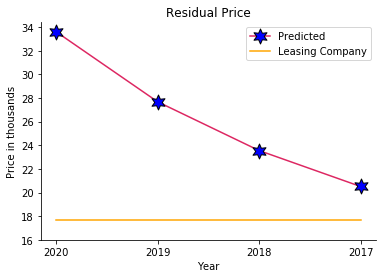

In [206]:
Years = ['2020', '2019', '2018', '2017']
ylabels = ['16', '18', '20', '22', '24', '26', '28', '30', '32', '34']
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_regular_asterisk(5)

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.plot(poly_model.predict(dep), label='Predicted', color='#dd2762', marker=star, markersize=15, markeredgecolor='black', markerfacecolor='blue')
ax.plot([0,1.0,2.0,3.0], [17677.40]*4, label='Leasing Company', color='orange')
ax.set_xticks([0,1.0,2.0,3.0])
ax.set_xticklabels(Years)
ax.set_yticks([16000, 18000, 20000, 22000, 24000, 26000, 28000, 30000, 32000, 34000])
ax.set_yticklabels(ylabels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Price in thousands', fontsize=10)
plt.title('Residual Price')
plt.legend()
fig.savefig('plot.png');

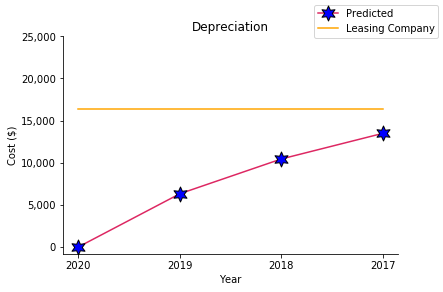

In [205]:
Years = ['2020', '2019', '2018', '2017']
star = mpath.Path.unit_regular_star(6)
ylabels3 = ['0', '5,000', '10,000', '15,000', '20,000', '25,000']

lease_2_standard = [0, 9953, 18353, 18353, 18353]
lease_3_standard = [0, 8320, 14596, 20872, 20872]
lease_4_standard = [0, 7883, 13655, 19427, 25199]

fig2, ax2 = plt.subplots(1,1)
ax2.plot(Years, cost_standard, label='Predicted', color='#dd2762', marker=star, markersize=15, markeredgecolor='black', markerfacecolor='blue')
ax2.plot(Years, [33995 - 17677.40]*4, color='orange', label='Leasing Company')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_yticks([0, 5000, 10000, 15000, 20000, 25000])
ax2.set_yticklabels(ylabels3)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Cost ($)', fontsize=10)
plt.title('Depreciation');
fig2.legend()
fig2.savefig('plot.png');